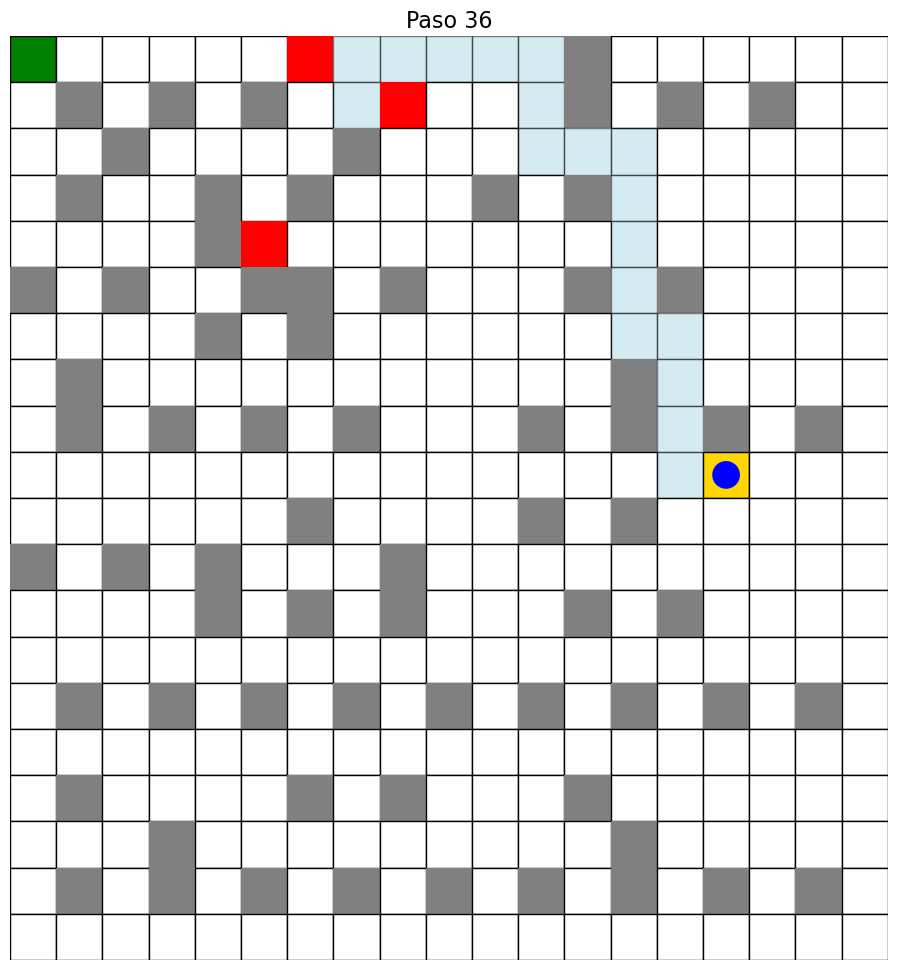

El agente ha llegado a su destino.

Grafo inicial antes de cualquier cambio dinámico:


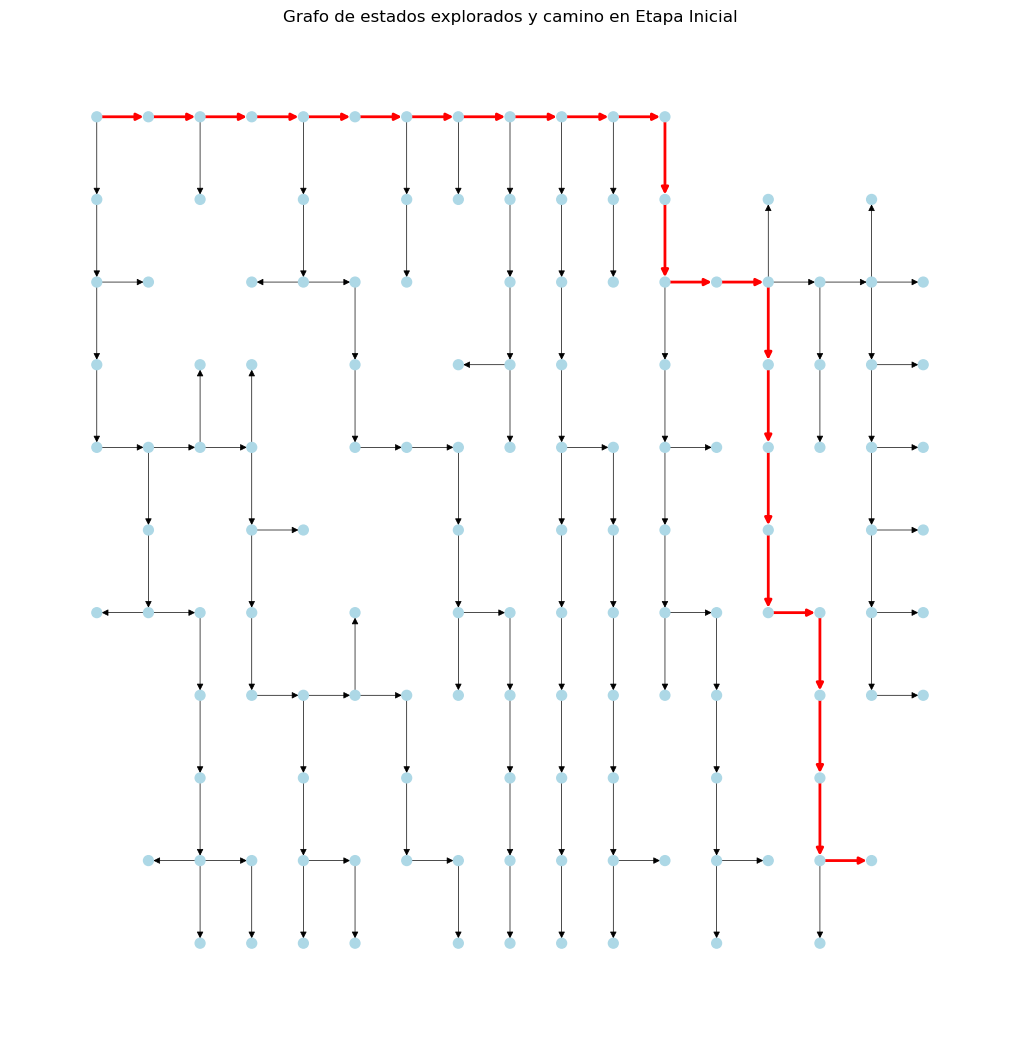

Total de nodos explorados en Etapa Inicial: 138
Total de estados en el camino en Etapa Inicial: 25
Total de nodos explorados en Etapa Inicial: 138

Grafo después del primer cambio dinámico:


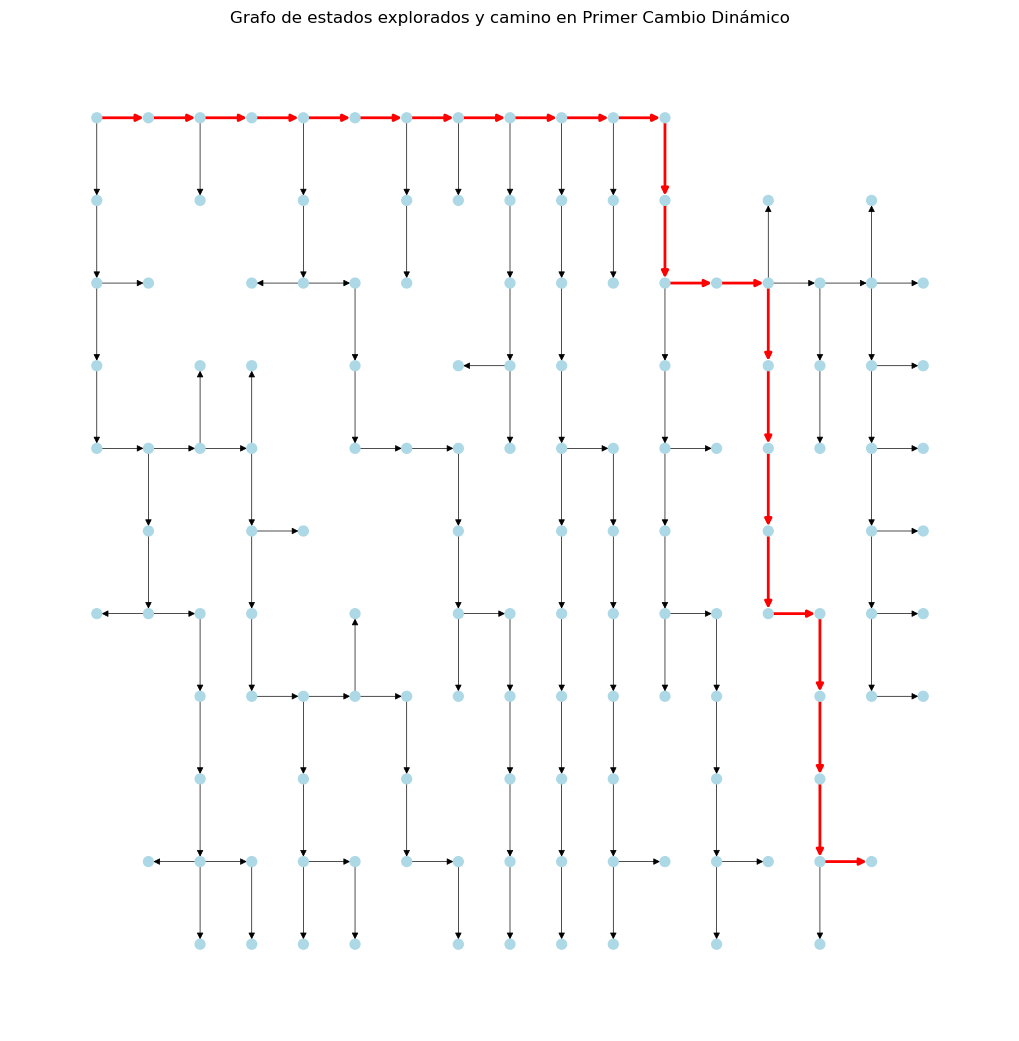

Total de nodos explorados en Primer Cambio Dinámico: 138
Total de estados en el camino en Primer Cambio Dinámico: 25
Total de nodos explorados en Primer Cambio Dinámico: 138

Grafo después del segundo cambio dinámico:


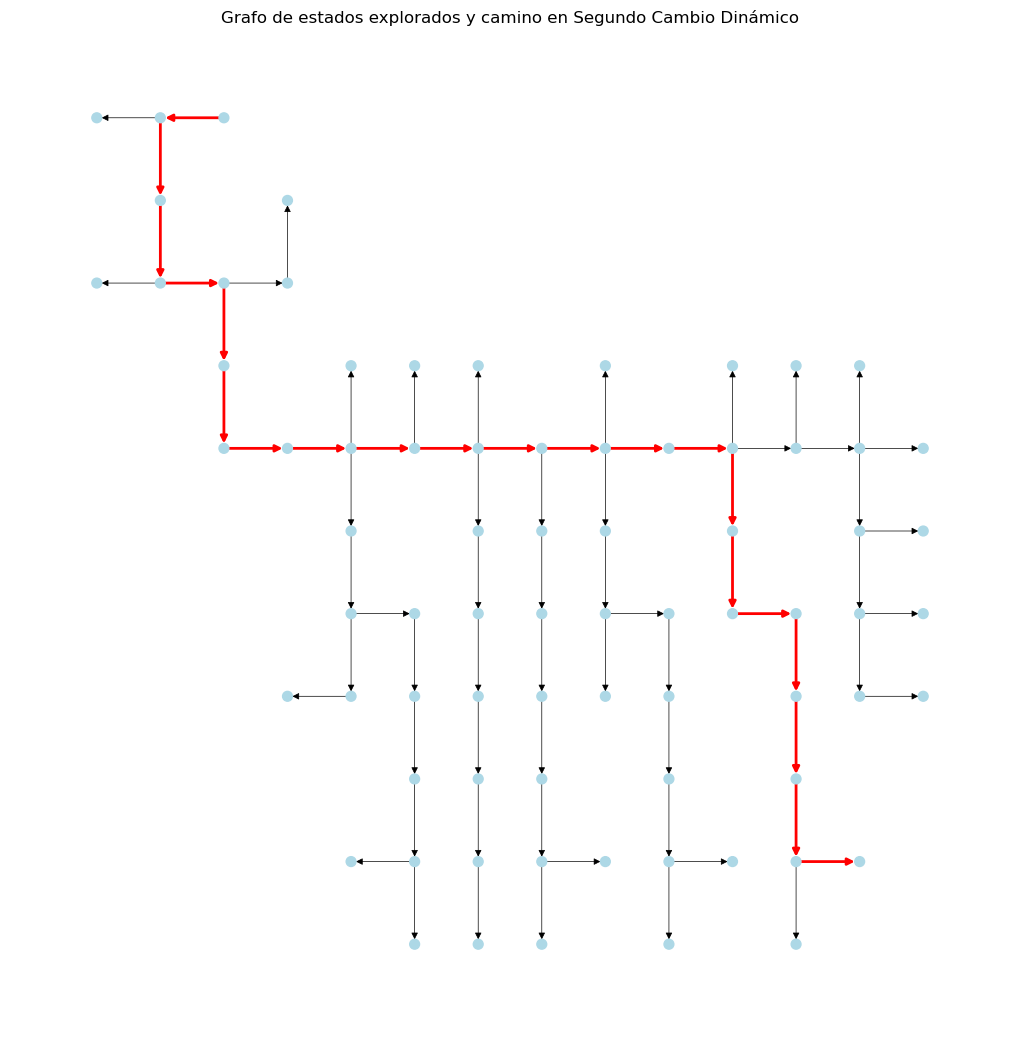

Total de nodos explorados en Segundo Cambio Dinámico: 75
Total de estados en el camino en Segundo Cambio Dinámico: 22
Total de nodos explorados en Segundo Cambio Dinámico: 75

Grafo después del tercer cambio dinámico:


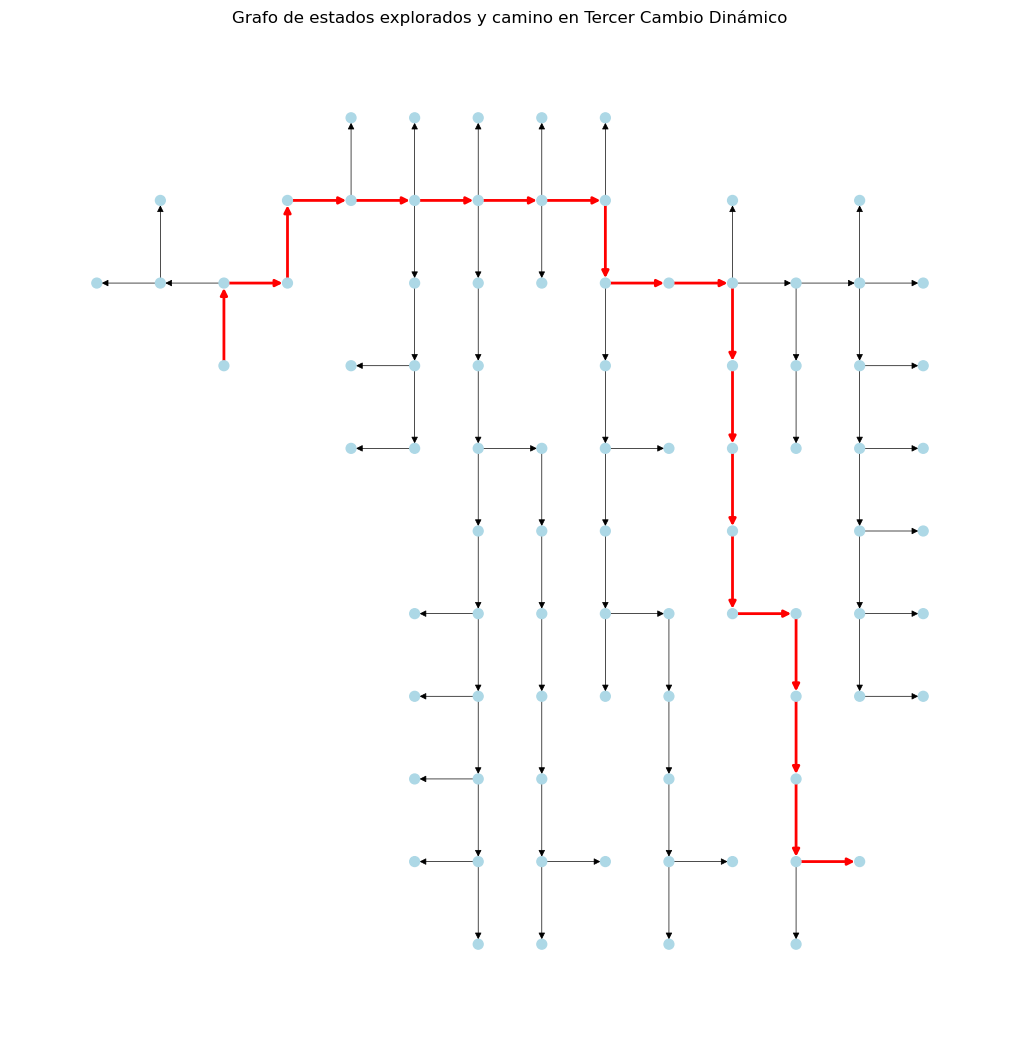

Total de nodos explorados en Tercer Cambio Dinámico: 86
Total de estados en el camino en Tercer Cambio Dinámico: 21
Total de nodos explorados en Tercer Cambio Dinámico: 86

Grafo final después de todos los cambios:


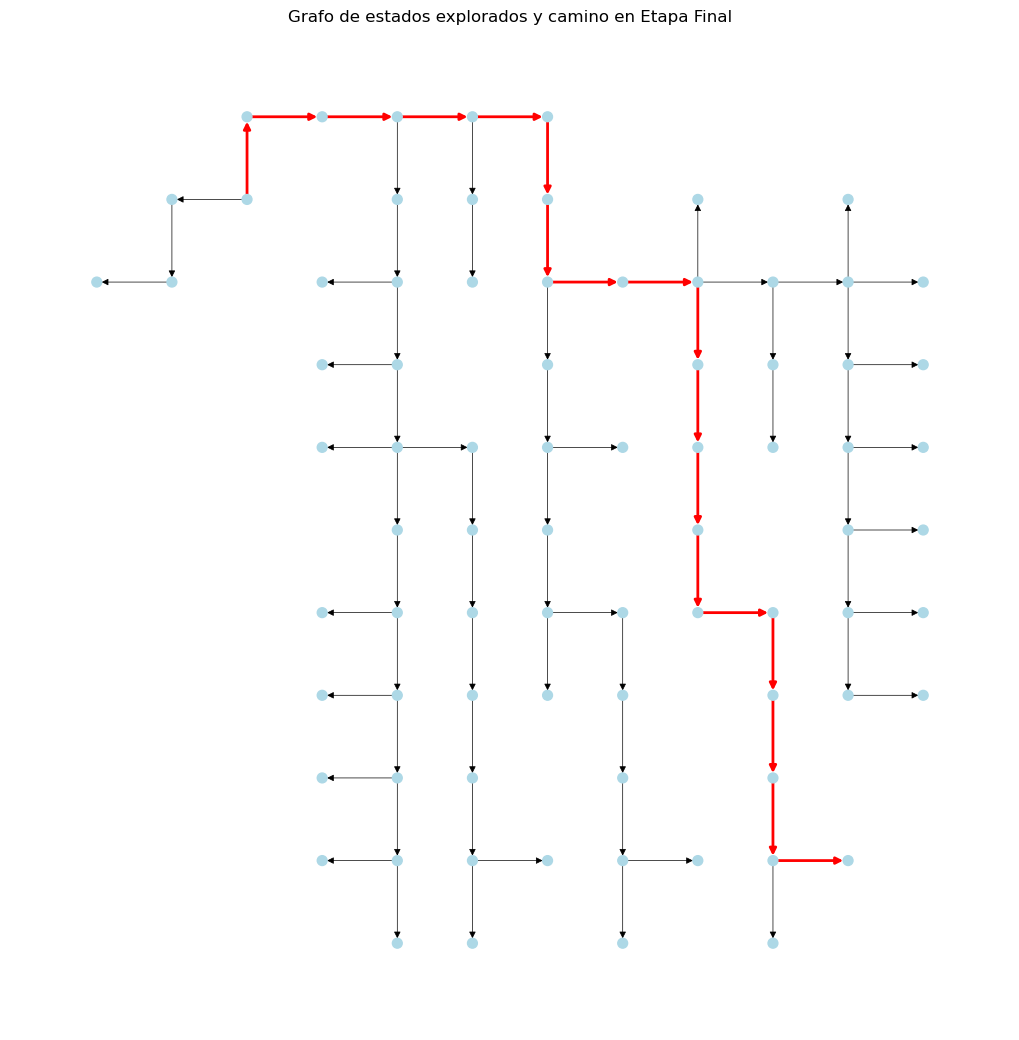

Total de nodos explorados en Etapa Final: 79
Total de estados en el camino en Etapa Final: 20
Total de nodos explorados en Etapa Final: 79
Tabla de estados y acciones:
Paso;Posición del Agente;Acción;Costo acumulado (g);Heurística (h);Costo estimado total (f)
0;(0, 0);Inicio;0;24;24
1;(0, 1);Mover Derecha;1;23;24
2;(0, 2);Mover Derecha;2;22;24
3;(0, 3);Mover Derecha;3;21;24
4;(0, 4);Mover Derecha;4;20;24
5;(0, 5);Mover Derecha;5;19;24
6;(0, 5);Mover Desconocido;6;19;25
7;(0, 4);Mover Izquierda;7;20;27
8;(1, 4);Mover Abajo;8;19;27
9;(2, 4);Mover Abajo;9;18;27
10;(2, 5);Mover Derecha;10;17;27
11;(3, 5);Mover Abajo;11;16;27
12;(3, 5);Mover Desconocido;12;16;28
13;(2, 5);Mover Arriba;13;17;30
14;(2, 6);Mover Derecha;14;16;30
15;(1, 6);Mover Arriba;15;17;32
16;(1, 7);Mover Derecha;16;16;32
17;(1, 7);Mover Desconocido;17;16;33
18;(0, 7);Mover Arriba;18;17;35
19;(0, 8);Mover Derecha;19;16;35
20;(0, 9);Mover Derecha;20;15;35
21;(0, 10);Mover Derecha;21;14;35
22;(0, 11);Mover Derecha;22;13;35
2

In [17]:
# Importamos las librerías necesarias
import heapq
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import networkx as nx
import time
from IPython.display import clear_output
import pandas as pd  # Para generar la tabla de pasos

# Definición del laberinto ampliado
initial_maze_data = [
    'S00000000000x000000',
    '0x0x0x000000x0x0x00',
    '00x0000x00000000000',
    '0x00x0x000x0x000000',
    '0000x00000000000000',
    'x0x00xx0x000x0x0000',
    '0000x0x000000000000',
    '0x00000000000x00000',
    '0x0x0x0x000x0x0x0x0',
    '000000000000000G000',
    '000000x0000x0x00000',
    'x0x0x000x0000000000',
    '0000x0x0x000x0x0000',
    '0000000000000000000',
    '0x0x0x0x0x0x0x0x0x0',
    '0000000000000000000',
    '0x0000x0x000x000000',
    '000x000000000x00000',
    '0x0x0x0x0x0x0x0x0x0',
    '0000000000000000000'
]

# Ajustamos el laberinto para que todas las filas tengan la misma longitud
max_length = max(len(row) for row in initial_maze_data)
initial_maze_data = [row.ljust(max_length, '0') for row in initial_maze_data]

# Convertimos el laberinto en una matriz
maze = [list(row) for row in initial_maze_data]
rows = len(maze)
cols = len(maze[0])

# Encontramos la posición inicial 'S' y el objetivo 'G'
start = None
goal = None
for i in range(rows):
    for j in range(cols):
        if maze[i][j] == 'S':
            start = (i, j)
        if maze[i][j] == 'G':
            goal = (i, j)

if start is None or goal is None:
    raise ValueError("No se encontró la posición inicial 'S' o la meta 'G' en el laberinto.")

# Movimientos posibles: arriba, abajo, izquierda, derecha
movements = [(-1, 0), (1, 0), (0, -1), (0, 1)]
movement_names = {(-1, 0): "Arriba", (1, 0): "Abajo", (0, -1): "Izquierda", (0, 1): "Derecha"}

# Función para verificar si una posición es válida
def is_valid(maze, x, y):
    if 0 <= x < rows and 0 <= y < cols:
        return maze[x][y] != 'x' and maze[x][y] != 'O'  # No es una pared ni obstáculo dinámico
    return False

# Función heurística (distancia Manhattan)
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Implementación del algoritmo A*
def a_star_search(maze, start, goal):
    open_list = []
    heapq.heappush(open_list, (heuristic(start, goal), 0, start, [start]))
    came_from = {}
    cost_so_far = {start: 0}
    G = nx.DiGraph()
    all_nodes = set()

    while open_list:
        _, current_cost, current, path = heapq.heappop(open_list)
        all_nodes.add(current)

        if current == goal:
            return path, G, all_nodes

        for dx, dy in movements:
            nx_, ny_ = current[0] + dx, current[1] + dy
            if is_valid(maze, nx_, ny_):
                neighbor = (nx_, ny_)
                new_cost = current_cost + 1
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    priority = new_cost + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (priority, new_cost, neighbor, path + [neighbor]))
                    came_from[neighbor] = current
                    G.add_edge(current, neighbor)
    return None, G, all_nodes

# Función para dibujar el laberinto
def draw_maze(maze, title="", agent_pos=None):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(12,12))
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.axis('off')
    ax.set_title(title, fontsize=16)

    for i in range(rows):
        for j in range(cols):
            cell = maze[i][j]
            x = j
            y = i
            if cell == 'x':
                # Pared
                rect = patches.Rectangle((x, y), 1, 1, facecolor='grey')
                ax.add_patch(rect)
            elif cell == 'O':
                # Obstáculo dinámico
                rect = patches.Rectangle((x, y), 1, 1, facecolor='red')
                ax.add_patch(rect)
            elif cell == 'T':
                # Trampa
                rect = patches.Rectangle((x, y), 1, 1, facecolor='red', edgecolor='black')
                ax.add_patch(rect)
                ax.text(x+0.5, y+0.5, 'T', ha='center', va='center', fontsize=12, color='white')
            elif cell == 'S':
                # Inicio
                rect = patches.Rectangle((x, y), 1, 1, facecolor='green', edgecolor='black')
                ax.add_patch(rect)
            elif cell == 'G':
                # Meta
                rect = patches.Rectangle((x, y), 1, 1, facecolor='gold', edgecolor='black')
                ax.add_patch(rect)
            else:
                # Celda vacía
                rect = patches.Rectangle((x, y), 1, 1, facecolor='white', edgecolor='black')
                ax.add_patch(rect)
    # Dibujar el agente si se proporciona la posición
    if agent_pos is not None:
        agent_x = agent_pos[1] + 0.5
        agent_y = agent_pos[0] + 0.5
        agent_circle = patches.Circle((agent_x, agent_y), 0.3, facecolor='blue')
        ax.add_patch(agent_circle)
    plt.show()
    time.sleep(0.5)  # Pausa de medio segundo

# Función para dibujar el laberinto y la ruta paso a paso
def draw_maze_step(maze, path, current_step, title="", visited_nodes=None):
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(12,12))
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.axis('off')
    ax.set_title(title, fontsize=16)

    for i in range(rows):
        for j in range(cols):
            cell = maze[i][j]
            x = j
            y = i
            if cell == 'x':
                # Pared
                rect = patches.Rectangle((x, y), 1, 1, facecolor='grey')
                ax.add_patch(rect)
            elif cell == 'O':
                # Obstáculo dinámico
                rect = patches.Rectangle((x, y), 1, 1, facecolor='red')
                ax.add_patch(rect)
            elif cell == 'T':
                # Trampa
                rect = patches.Rectangle((x, y), 1, 1, facecolor='red', edgecolor='black')
                ax.add_patch(rect)
                ax.text(x+0.5, y+0.5, 'T', ha='center', va='center', fontsize=12, color='white')
            elif cell == 'S':
                # Inicio
                rect = patches.Rectangle((x, y), 1, 1, facecolor='green', edgecolor='black')
                ax.add_patch(rect)
            elif cell == 'G':
                # Meta
                rect = patches.Rectangle((x, y), 1, 1, facecolor='gold', edgecolor='black')
                ax.add_patch(rect)
            elif visited_nodes and (i, j) in visited_nodes:
                # Nodos visitados
                rect = patches.Rectangle((x, y), 1, 1, facecolor='lightyellow', edgecolor='black', alpha=0.5)
                ax.add_patch(rect)
            elif (i, j) in path[:current_step]:
                # Camino recorrido hasta el paso actual
                rect = patches.Rectangle((x, y), 1, 1, facecolor='lightblue', edgecolor='black', alpha=0.5)
                ax.add_patch(rect)
            else:
                # Celda vacía
                rect = patches.Rectangle((x, y), 1, 1, facecolor='white', edgecolor='black')
                ax.add_patch(rect)
    # Posición actual del agente
    if current_step - 1 < len(path):
        current_pos = path[current_step - 1]
        agent_x = current_pos[1] + 0.5
        agent_y = current_pos[0] + 0.5
        agent_circle = patches.Circle((agent_x, agent_y), 0.3, facecolor='blue')
        ax.add_patch(agent_circle)
    plt.show()
    time.sleep(0.2)  # Pausa de 0.2 segundos

# Función para guardar el grafo y el camino en cada etapa
def save_graph_stage(G, path_states, stage_name):
    plt.figure(figsize=(10, 10))
    pos = {node: (node[1], -node[0]) for node in G.nodes()}
    path_edges = list(zip(path_states[:-1], path_states[1:]))
    edge_colors = ['red' if edge in path_edges else 'black' for edge in G.edges()]
    edge_widths = [2 if edge in path_edges else 0.5 for edge in G.edges()]
    node_colors = ['lightblue' if node in G.nodes() else 'white' for node in G.nodes()]
    nx.draw(G, pos, node_size=50, node_color=node_colors, with_labels=False, arrows=True,
            edge_color=edge_colors, width=edge_widths)
    plt.title(f"Grafo de estados explorados y camino en {stage_name}")
    plt.show()
    # Mostrar el total de nodos explorados y estados
    total_nodos = len(G.nodes())
    total_estados = len(path_states)
    print(f"Total de nodos explorados en {stage_name}: {total_nodos}")
    print(f"Total de estados en el camino en {stage_name}: {total_estados}")

# Simulación del desplazamiento del agente con A*
if __name__ == "__main__":
    # Mostrar el entorno inicial
    draw_maze(maze, title="Entorno Inicial", agent_pos=start)

    # Inicializamos A*
    path, G, all_nodes = a_star_search(maze, start, goal)

    if path:
        print("Simulación del desplazamiento del agente con A*:")
        step = 1
        global_step = 1  # Contador global de pasos
        dynamic_changes = [6, 12, 17]  # Lista de pasos globales en los que se agregan obstáculos
        path_states = []
        table_data = []

        # Guardamos el grafo y el camino inicial antes de cualquier cambio
        initial_graph = G.copy()
        initial_path_states = path.copy()
        total_nodes_explored = set(all_nodes)

        while step < len(path):
            current_pos = path[step - 1]
            draw_maze_step(maze, path, step, title=f"Paso {global_step}")
            path_states.append(current_pos)

            # Agregamos información a la tabla
            if global_step == 1:
                action = 'Inicio'
            else:
                prev_pos = path_states[-2]
                dx = current_pos[0] - prev_pos[0]
                dy = current_pos[1] - prev_pos[1]
                action = 'Mover ' + movement_names.get((dx, dy), 'Desconocido')

            g_value = global_step - 1
            h_value = heuristic(current_pos, goal)
            f_value = g_value + h_value

            table_data.append({
                'Paso': global_step - 1,
                'Posición del Agente': current_pos,
                'Acción': action,
                'Costo acumulado (g)': g_value,
                'Heurística (h)': h_value,
                'Costo estimado total (f)': f_value
            })

            # En los pasos especificados, agregamos nuevos obstáculos
            if global_step in dynamic_changes:
                if step < len(path) - 1:
                    # Añadimos un obstáculo en la posición siguiente del camino planificado
                    obstacle_pos = path[step]
                    maze[obstacle_pos[0]][obstacle_pos[1]] = 'O'  # Usamos 'O' para el obstáculo dinámico
                    print(f"Obstáculo añadido en la posición {obstacle_pos} en el paso {global_step}")
                    # Mostrar el entorno después del cambio con el agente
                    draw_maze(maze, title="Entorno Después del Cambio", agent_pos=current_pos)
                    time.sleep(1)  # Pausa de un segundo para visualizar el cambio
                    # Guardamos el grafo y el camino antes del cambio
                    if global_step == dynamic_changes[0]:
                        graph_stage1 = G.copy()
                        path_stage1 = path.copy()
                        path_states_stage1 = path_states.copy()
                        total_nodes_explored_stage1 = total_nodes_explored.copy()
                    elif global_step == dynamic_changes[1]:
                        graph_stage2 = G.copy()
                        path_stage2 = path.copy()
                        path_states_stage2 = path_states.copy()
                        total_nodes_explored_stage2 = total_nodes_explored.copy()
                    elif global_step == dynamic_changes[2]:
                        graph_stage3 = G.copy()
                        path_stage3 = path.copy()
                        path_states_stage3 = path_states.copy()
                        total_nodes_explored_stage3 = total_nodes_explored.copy()
                    # Volvemos a planificar desde la posición actual
                    path, G, all_nodes = a_star_search(maze, current_pos, goal)
                    if path is None:
                        print("No se encontró una ruta alternativa después de añadir el obstáculo.")
                        break
                    step = 1  # Reiniciamos el paso
                    path_states = [current_pos]
                    total_nodes_explored.update(all_nodes)
                    global_step += 1
                    continue  # Volvemos al inicio del while con el nuevo camino
                else:
                    print("No se puede añadir obstáculo en la posición final.")
            step += 1
            global_step += 1  # Incrementamos el paso global
        else:
            # Último paso
            current_pos = path[-1]
            path_states.append(current_pos)
            draw_maze_step(maze, path, len(path), title=f"Paso {global_step}")
            print("El agente ha llegado a su destino.")
            # Agregar el último paso a la tabla
            g_value = global_step - 1
            h_value = heuristic(current_pos, goal)
            f_value = g_value + h_value
            table_data.append({
                'Paso': global_step - 1,
                'Posición del Agente': current_pos,
                'Acción': 'Llegada',
                'Costo acumulado (g)': g_value,
                'Heurística (h)': h_value,
                'Costo estimado total (f)': f_value
            })

        # Guardamos el grafo y el camino final
        final_graph = G.copy()
        final_path_states = path_states.copy()
        total_nodes_explored_final = total_nodes_explored.copy()

        # Mostrar los grafos de cada etapa
        print("\nGrafo inicial antes de cualquier cambio dinámico:")
        save_graph_stage(initial_graph, initial_path_states, "Etapa Inicial")
        print(f"Total de nodos explorados en Etapa Inicial: {len(initial_graph.nodes())}")

        print("\nGrafo después del primer cambio dinámico:")
        save_graph_stage(graph_stage1, path_stage1, "Primer Cambio Dinámico")
        print(f"Total de nodos explorados en Primer Cambio Dinámico: {len(graph_stage1.nodes())}")

        print("\nGrafo después del segundo cambio dinámico:")
        save_graph_stage(graph_stage2, path_stage2, "Segundo Cambio Dinámico")
        print(f"Total de nodos explorados en Segundo Cambio Dinámico: {len(graph_stage2.nodes())}")

        print("\nGrafo después del tercer cambio dinámico:")
        save_graph_stage(graph_stage3, path_stage3, "Tercer Cambio Dinámico")
        print(f"Total de nodos explorados en Tercer Cambio Dinámico: {len(graph_stage3.nodes())}")

        print("\nGrafo final después de todos los cambios:")
        save_graph_stage(final_graph, final_path_states, "Etapa Final")
        print(f"Total de nodos explorados en Etapa Final: {len(final_graph.nodes())}")

        # Generamos y mostramos la tabla
        df = pd.DataFrame(table_data)
        pd.set_option('display.max_colwidth', None)
        print("Tabla de estados y acciones:")
        print(df.to_csv(sep=';', index=False))
    else:
        print("No se encontró una solución.")
